In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [16]:
carseats = pd.read_csv("Carseats.csv")

In [4]:
carseats.shape

(400, 11)

In [3]:
carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.4+ KB


In [6]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [18]:
carseats["Urban"] = carseats["Urban"].astype('category')
carseats["US"] = carseats["US"].astype('category')
        
carseats["Urban"] = carseats["Urban"].cat.codes
carseats["US"] = carseats["US"].cat.codes

In [32]:
x_train = carseats[['Price','Urban','US']]
y_train = carseats['Sales']

In [33]:
x_train.head()

,Price,Urban,US
0,120,1,1
1,83,1,1
2,80,1,1
3,97,1,1
4,128,1,0


In [34]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
print(lm.intercept_)
print(lm.coef_)

13.0434689368
[-0.05445885 -0.02191615  1.2005727 ]


In [36]:
coeff_df = pd.DataFrame(lm.coef_,x_train.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Price,-0.054459
Urban,-0.021916
US,1.200573


In [30]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# np.random.seed(9876789)

In [37]:
mod = smf.ols(formula='Sales ~ Price + Urban + US', data=carseats)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.39e-23
Time:                        12:12:10   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0435      0.651     20.036      0.0

* The coefficient of the Price variable shows that the average effect of a price increase of 1 dollar
 is a decrease of 54.4588492 units in sales when all other predictors remaining fixed. 
* The coefficient of the Urban variable may be interpreted by saying that on average the unit sales in urban location are 21.91 units less than in rural location when all other predictors remaining fixed. 
* The coefficient of the “US” variable may be interpreted by saying that on average the unit sales in a US store are 1200.6 units more than in a non US store all other predictors remaining fixed.

#### The formula could be written as follows:
$$Sales=13.0434689+(−0.0544588)×Price+(−0.0219162)×Urban+(1.2005727)×US+\epsilon$$
with Urban=1 if the store is in an urban location and 0 if not, and US=1if the store is in the US and 0 if not.

#### And since $p$ value for both $Price$ and $US$ variables are less than 0.05, we could reject the null hypothesis.

In [38]:
mod = smf.ols(formula='Sales ~ Price + US', data=carseats)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.66e-24
Time:                        12:24:43   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.0

* The R-squared for the smaller model is similar with the bigger model, but the value $AIC$ and $BIC$ are slightly smaller, hence we might say the smaller model is marginally better than the bigger model. 

In [42]:
conf = res.conf_int(alpha=0.05, cols= None)

In [44]:
conf.columns = ['2.5 %','97.5 %']
conf

,2.5 %,97.5 %
Intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US,0.69152,1.707766


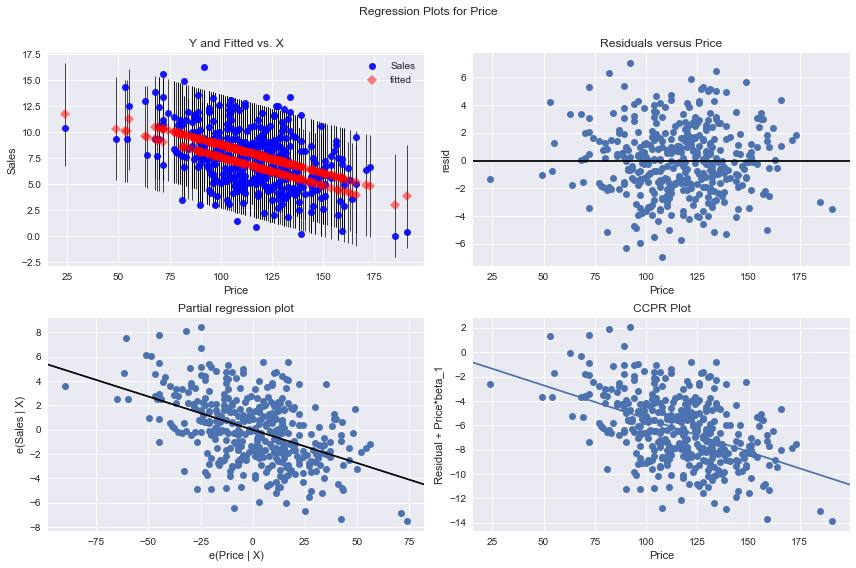

In [45]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(res, "Price", fig=fig)

#### Based on the above residual plot, we could see the presence of a few outliers.

### Problem 14

In [98]:
np.random.seed(1)
x1 = np.random.uniform(0,1,100)
x2 = 0.5 * x1 + np.random.normal(0,1,100)/10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(0,1,100)

The form of the linear model is
$$Y=2+2X1+0.3X2+\epsilon$$

with $\epsilon$ follow a $N(0,1)$ random variable. The regression coefficients are respectively 2 and 0.3.

In [121]:
df = pd.DataFrame([x1,x2,y])
df = df.transpose()
df.columns = ['x1','x2','y']
df.head()

,x1,x2,y
0,0.417022,0.240074,2.949735
1,0.720324,0.157942,3.261717
2,0.000114,-0.030563,3.322517
3,0.302333,0.233964,2.387546
4,0.146756,0.096387,3.002498


In [122]:
print (np.corrcoef(x1,x2))

[[ 1.          0.83905962]
 [ 0.83905962  1.        ]]


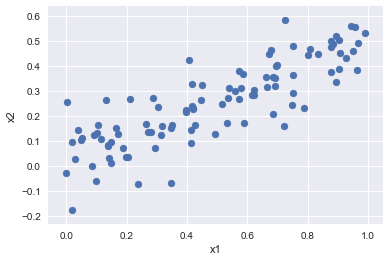

In [106]:
plt.scatter(x1, x2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

* The two variables are positively correlated.

In [123]:
mod = smf.ols(formula='y ~ x1+x2', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           4.40e-07
Time:                        16:57:19   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1893      0.199     11.021      0.0

* The coefficients β̂0, β̂1 and β̂2 are respectively 2.1893, 0.7046 and 2.5024. As the p-value is less than 0.05 we may reject H0 for β1, however we may not reject H0 for β2 as the p-value is higher than 0.05.

In [124]:
mod = smf.ols(formula='y ~ x1', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           6.68e-07
Time:                        17:01:51   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.0

* The coefficient for “x1” in this last model is very different from the one with “x1” and “x2” as predictors. In this case “x1” is highly significant as its p-value is very low, so we may reject H0.

In [125]:
mod = smf.ols(formula='y ~ x2', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.09e-07
Time:                        17:01:55   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.0

* The coefficient for “x2” in this model is very different from the one with “x1” and “x2” as predictors. In this case “x2” is highly significant as its p-value is very low, so we may again reject H0.

#### Do the results obtained in (c)–(e) contradict each other? Explain your answer.

No, the results do not contradict each other. As the predictors “x1” and “x2” are highly correlated we 
are in the presence of collinearity, in this case it can be difficult to determine how each predictor 
separately is associated with the response. Since collinearity reduces the accuracy of the estimates 
of the regression coefficients, it causes the standard error for β̂1 to grow.Consequently, we may fail to reject H0 in the presence of collinearity. The importance of the “x2” variable has been masked due to the presence of collinearity.

In [137]:
new = [0.1,0.8,6]
new = pd.DataFrame(new).transpose()
new.columns = ['x1','x2','y']
df_new = pd.concat([df,new])

In [144]:
mod = smf.ols(formula='y ~ x1+x2', data=df_new)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     19.92
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           5.51e-08
Time:                        17:15:21   Log-Likelihood:                -144.15
No. Observations:                 101   AIC:                             294.3
Df Residuals:                      98   BIC:                             302.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1996      0.199     11.041      0.0

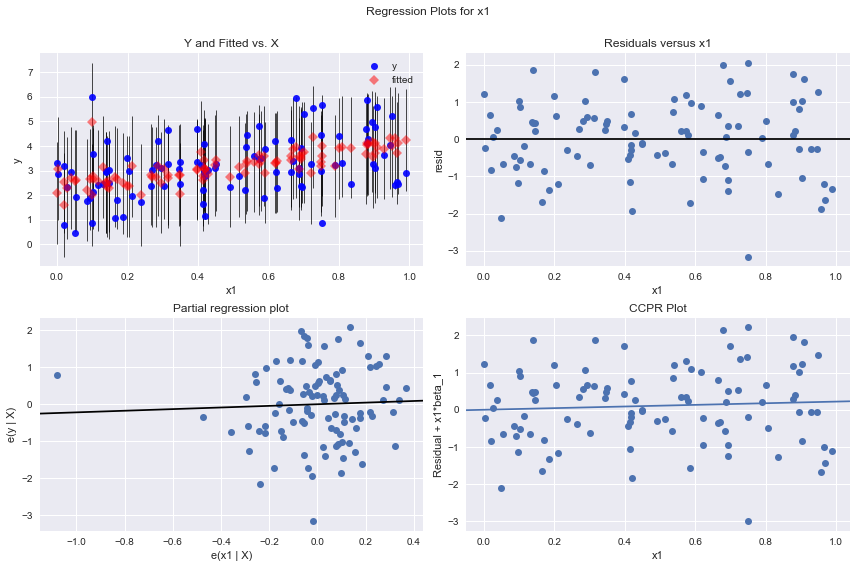

In [145]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(res, "x1", fig=fig)

In [146]:
mod = smf.ols(formula='y ~ x1', data=df_new)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     21.89
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           9.15e-06
Time:                        17:17:52   Log-Likelihood:                -151.28
No. Observations:                 101   AIC:                             306.6
Df Residuals:                      99   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3583      0.208     11.331      0.0

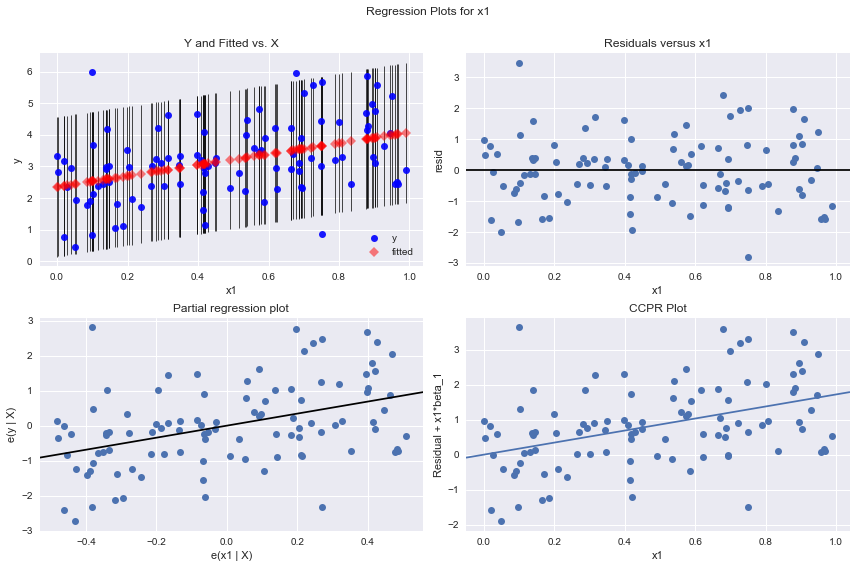

In [147]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(res, "x1", fig=fig)

In [149]:
mod = smf.ols(formula='y ~ x2', data=df_new)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     39.99
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           7.41e-09
Time:                        17:18:09   Log-Likelihood:                -144.24
No. Observations:                 101   AIC:                             292.5
Df Residuals:                      99   BIC:                             297.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2331      0.182     12.271      0.0

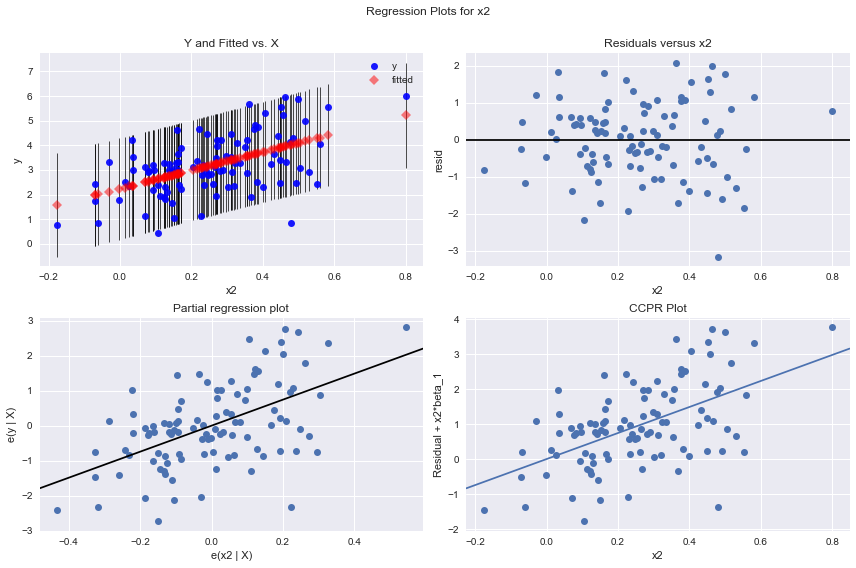

In [150]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(res, "x2", fig=fig)

* In all the three models, the last point is a high-leverage point.

### Problem 15

In [46]:
boston = pd.read_csv("Boston.csv")

In [47]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [166]:
mod = smf.ols(formula='crim ~ zn', data=boston)
res = mod.fit()
zn_coef = res.params[1]
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           5.51e-06
Time:                        17:25:45   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4537      0.417     10.675      0.0

In [165]:
mod = smf.ols(formula='crim ~ indus', data=boston)
res = mod.fit()
indus_coef = res.params[1]
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     99.82
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.45e-21
Time:                        17:25:34   Log-Likelihood:                -1760.6
No. Observations:                 506   AIC:                             3525.
Df Residuals:                     504   BIC:                             3534.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0637      0.667     -3.093      0.0

In [164]:
mod = smf.ols(formula='crim ~ chas', data=boston)
res = mod.fit()
chas_coef = res.params[1]
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.579
Date:                Wed, 11 Oct 2017   Prob (F-statistic):              0.209
Time:                        17:25:27   Log-Likelihood:                -1805.6
No. Observations:                 506   AIC:                             3615.
Df Residuals:                     504   BIC:                             3624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7444      0.396      9.453      0.0

In [163]:
mod = smf.ols(formula='crim ~ nox', data=boston)
res = mod.fit()
nox_coef = res.params[1]
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     108.6
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           3.75e-23
Time:                        17:25:17   Log-Likelihood:                -1757.0
No. Observations:                 506   AIC:                             3518.
Df Residuals:                     504   BIC:                             3526.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.7199      1.699     -8.073      0.0

In [162]:
mod = smf.ols(formula='crim ~ rm', data=boston)
res = mod.fit()
rm_coef = res.params[1]
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     25.45
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           6.35e-07
Time:                        17:25:09   Log-Likelihood:                -1793.9
No. Observations:                 506   AIC:                             3592.
Df Residuals:                     504   BIC:                             3600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.4818      3.364      6.088      0.0

In [161]:
mod = smf.ols(formula='crim ~ age', data=boston)
res = mod.fit()
age_coef = res.params[1]
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     71.62
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.85e-16
Time:                        17:24:59   Log-Likelihood:                -1772.7
No. Observations:                 506   AIC:                             3549.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7779      0.944     -4.002      0.0

In [160]:
mod = smf.ols(formula='crim ~ dis', data=boston)
res = mod.fit()
dis_coef = res.params[1]
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     84.89
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           8.52e-19
Time:                        17:24:44   Log-Likelihood:                -1767.0
No. Observations:                 506   AIC:                             3538.
Df Residuals:                     504   BIC:                             3546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4993      0.730     13.006      0.0

In [159]:
mod = smf.ols(formula='crim ~ rad', data=boston)
res = mod.fit()
rad_coef = res.params[1]
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     323.9
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.69e-56
Time:                        17:24:35   Log-Likelihood:                -1680.8
No. Observations:                 506   AIC:                             3366.
Df Residuals:                     504   BIC:                             3374.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2872      0.443     -5.157      0.0

In [169]:
mod = smf.ols(formula='crim ~ tax', data=boston)
res = mod.fit()
tax_coef = res.params[1]
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     259.2
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.36e-47
Time:                        17:29:35   Log-Likelihood:                -1701.4
No. Observations:                 506   AIC:                             3407.
Df Residuals:                     504   BIC:                             3415.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5284      0.816    -10.454      0.0

In [158]:
mod = smf.ols(formula='crim ~ ptratio', data=boston)
res = mod.fit()
ptratio_coef = res.params[1]
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     46.26
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.94e-11
Time:                        17:24:24   Log-Likelihood:                -1784.1
No. Observations:                 506   AIC:                             3572.
Df Residuals:                     504   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.6469      3.147     -5.607      0.0

In [157]:
mod = smf.ols(formula='crim ~ black', data=boston)
res = mod.fit()
black_coef = res.params[1]
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     87.74
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.49e-19
Time:                        17:24:11   Log-Likelihood:                -1765.8
No. Observations:                 506   AIC:                             3536.
Df Residuals:                     504   BIC:                             3544.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.5535      1.426     11.609      0.0

In [155]:
mod = smf.ols(formula='crim ~ lstat', data=boston)
res = mod.fit()
lstat_coef = res.params[1]
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     132.0
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.65e-27
Time:                        17:23:51   Log-Likelihood:                -1747.5
No. Observations:                 506   AIC:                             3499.
Df Residuals:                     504   BIC:                             3507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3305      0.694     -4.801      0.0

In [156]:
mod = smf.ols(formula='crim ~ medv', data=boston)
res = mod.fit()
medv_coef = res.params[1]
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.17e-19
Time:                        17:23:58   Log-Likelihood:                -1765.0
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7965      0.934     12.628      0.0

* All predictors have a p-value less than 0.05 except chas, so we may conclude that there is a statistically significant association between each predictor and the response except for the chas predictor.

In [152]:
mod = smf.ols(formula='crim ~ zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat+medv',data=boston)
res = mod.fit()
mod_coef = res.params
print (mod_coef)
print(res.summary())

Intercept    17.033228
zn            0.044855
indus        -0.063855
chas         -0.749134
nox         -10.313535
rm            0.430131
age           0.001452
dis          -0.987176
rad           0.588209
tax          -0.003780
ptratio      -0.271081
black        -0.007538
lstat         0.126211
medv         -0.198887
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.57e-56
Time:                        17:23:00   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                      

* Based on the p value, we may reject the null hypothesis for “zn”, “dis”, “rad”, “black” and “medv”.

In [177]:
# mod_coef
coef = pd.DataFrame([zn_coef,indus_coef,chas_coef,nox_coef,rm_coef,age_coef,\
              dis_coef,rad_coef,tax_coef,ptratio_coef,black_coef,lstat_coef,medv_coef])
mod_coef = mod_coef[1:14]
plt.plot(coef,mod_coef)

In [76]:
mod = smf.ols(formula='crim ~ zn + I(zn ** 2.0) + I(zn ** 3.0)', data=boston)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.28e-06
Time:                        13:19:08   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.8461      0.433     11.192   

In [77]:
mod = smf.ols(formula='crim ~ indus + I(indus ** 2.0) + I(indus ** 3.0)', data=boston)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     58.69
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.55e-32
Time:                        13:20:25   Log-Likelihood:                -1730.3
No. Observations:                 506   AIC:                             3469.
Df Residuals:                     502   BIC:                             3486.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.6626      1.574     

In [78]:
mod = smf.ols(formula='crim ~ nox + I(nox ** 2.0) + I(nox ** 3.0)', data=boston)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     70.69
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           3.81e-38
Time:                        13:22:22   Log-Likelihood:                -1717.2
No. Observations:                 506   AIC:                             3442.
Df Residuals:                     502   BIC:                             3459.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       233.0866     33.643      6.928

In [79]:
mod = smf.ols(formula='crim ~ rm + I(rm ** 2.0) + I(rm ** 3.0)', data=boston)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     12.17
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.07e-07
Time:                        13:22:45   Log-Likelihood:                -1788.6
No. Observations:                 506   AIC:                             3585.
Df Residuals:                     502   BIC:                             3602.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      112.6246     64.517      1.746   

In [80]:
mod = smf.ols(formula='crim ~ age + I(age ** 2.0) + I(age ** 3.0)', data=boston)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     35.31
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.02e-20
Time:                        13:22:56   Log-Likelihood:                -1757.9
No. Observations:                 506   AIC:                             3524.
Df Residuals:                     502   BIC:                             3541.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.5488      2.769     -0.920

In [81]:
mod = smf.ols(formula='crim ~ dis + I(dis ** 2.0) + I(dis ** 3.0)', data=boston)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     64.37
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           3.14e-35
Time:                        13:23:16   Log-Likelihood:                -1724.0
No. Observations:                 506   AIC:                             3456.
Df Residuals:                     502   BIC:                             3473.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        30.0476      2.446     12.285

In [82]:
mod = smf.ols(formula='crim ~ rad + I(rad ** 2.0) + I(rad ** 3.0)', data=boston)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     111.6
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           2.31e-55
Time:                        13:23:39   Log-Likelihood:                -1677.1
No. Observations:                 506   AIC:                             3362.
Df Residuals:                     502   BIC:                             3379.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.6055      2.050     -0.295

In [83]:
mod = smf.ols(formula='crim ~ tax + I(tax ** 2.0) + I(tax ** 3.0)', data=boston)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     97.80
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           7.34e-50
Time:                        13:23:52   Log-Likelihood:                -1689.9
No. Observations:                 506   AIC:                             3388.
Df Residuals:                     502   BIC:                             3405.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        19.1836     11.796      1.626

In [84]:
mod = smf.ols(formula='crim ~ ptratio + I(ptratio ** 2.0) + I(ptratio ** 3.0)', data=boston)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     21.48
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           4.17e-13
Time:                        13:24:23   Log-Likelihood:                -1775.8
No. Observations:                 506   AIC:                             3560.
Df Residuals:                     502   BIC:                             3577.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           477.1840    156.79

In [85]:
mod = smf.ols(formula='crim ~ black + I(black ** 2.0) + I(black ** 3.0)', data=boston)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     29.49
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.41e-17
Time:                        13:24:55   Log-Likelihood:                -1765.3
No. Observations:                 506   AIC:                             3539.
Df Residuals:                     502   BIC:                             3555.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          18.2637      2.305     

In [86]:
mod = smf.ols(formula='crim ~ lstat + I(lstat ** 2.0) + I(lstat ** 3.0)', data=boston)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     46.63
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.35e-26
Time:                        13:25:18   Log-Likelihood:                -1744.2
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     502   BIC:                             3513.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.2010      2.029     

In [87]:
mod = smf.ols(formula='crim ~ medv + I(medv ** 2.0) + I(medv ** 3.0)', data=boston)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     121.3
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           4.45e-59
Time:                        13:25:38   Log-Likelihood:                -1668.5
No. Observations:                 506   AIC:                             3345.
Df Residuals:                     502   BIC:                             3362.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         53.1655      3.356     15.

For “zn”, “rm”, “rad”, “tax” and “lstat” as predictor, the p-values suggest that the cubic coefficient is not 
statistically significant; for “indus”, “nox”, “age”, “dis”, “ptratio” and “medv” as predictor, the p-values suggest 
the adequacy of the cubic fit. For “black” as predictor, the p-values suggest that both the quandratic and cubic 
coefficients are not statistically significant.